In [1]:
import boto3
import yaml

with open("../../.aws_config.yml") as handle:
    config = yaml.load(Loader=yaml.SafeLoader, stream=handle)

AWS_SERVER_PUBLIC_KEY = config['public_key']
AWS_SERVER_SECRET_KEY = config['secret_key']

s3 = boto3.resource(
    's3',
    aws_access_key_id=AWS_SERVER_PUBLIC_KEY,
    aws_secret_access_key=AWS_SERVER_SECRET_KEY,
)
client = boto3.client(
    's3',
    aws_access_key_id=AWS_SERVER_PUBLIC_KEY,
    aws_secret_access_key=AWS_SERVER_SECRET_KEY
)

bucketName = 'revealdata-argentina'

In [2]:
bucket = s3.Bucket(bucketName)

objs = bucket.objects.all()

files = []
for obj in objs:
    if ('metadata' not in obj.key) and ('data-subset' in obj.key):
        files.append(obj.key)

In [3]:
metadata = []
for obj in objs:
    if ('metadata' in obj.key) and ('data-subset' in obj.key):
        metadata.append(obj.key)

In [5]:
import pandas as pd
import io

df = pd.read_csv(
    io.BytesIO(client.get_object(
        Bucket=bucketName, 
        Key=files[10])['Body'].read()), encoding='utf8')

In [17]:
df = df.loc[(df['accuracy'] < 25) & (df['accuracy'] > 1)]

In [8]:
import scprep

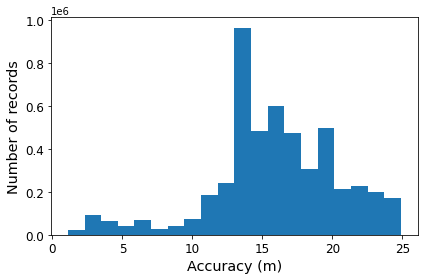

In [20]:
scprep.plot.histogram(df['accuracy'], xlabel='Accuracy (m)', ylabel='Number of records', bins=20)

In [52]:
df['utc_timestamp'] = df['utc_timestamp'].astype(pd.DatetimeTZDtype(tz='utc'))

In [59]:
df = df.sort_values('utc_timestamp')

In [60]:
df

,utc_timestamp,advertiser_id,lat,lon,accuracy,country_iso3
6583198,2020-05-07 00:00:00+00:00,c51ed8e2-1112-4e66-857c-90c5fceffa19,-34.494275,-58.503591,13.0,ARG
1528242,2020-05-07 00:00:00+00:00,32717981-3ab4-4719-807f-ad810bcb2cb6,-25.289474,-57.745567,14.0,ARG
6701409,2020-05-07 00:00:00+00:00,d773bd59-4b97-4eb1-8f46-9629424b6303,-23.948353,-64.803524,22.0,ARG
5576490,2020-05-07 00:00:00+00:00,a9d0164f-bc39-4df6-a28d-8333c897f2fe,-34.558360,-58.444686,9.0,ARG
1694509,2020-05-07 00:00:00+00:00,3489b545-3fc8-4401-9e9a-ca89fa176578,-38.704811,-62.278642,14.0,ARG
...,...,...,...,...,...,...
3532059,2020-05-07 23:59:59+00:00,6e7a8910-d094-4b85-ae24-3ffb3f76fcb9,-34.580151,-58.435401,11.0,ARG
4748600,2020-05-07 23:59:59+00:00,966842e1-923b-4e63-9b86-b10b76c77114,-32.945124,-60.655793,18.0,ARG
2673864,2020-05-07 23:59:59+00:00,5567bb2d-9d24-4d0c-b70d-93208a2d4f99,-34.597035,-58.422079,14.0,ARG
6945145,2020-05-07 23:59:59+00:00,d98800db-fcad-4012-9390-c849ac575c43,-31.549687,-68.553947,20.0,ARG


In [61]:
import geopy.distance

def geo_dist(x, y):
    return geopy.distance.distance(x[['lat', 'lon']], y[['lat', 'lon']]).m - x['accuracy'] - y['accuracy']

def date_dist(x, y):
    return (x['utc_timestamp'] - y['utc_timestamp']).seconds

In [29]:
import sklearn.neighbors

In [83]:
df['timestamp'] = (df['utc_timestamp'].astype(int) / 1e9).astype(int)

In [85]:
knn_op = sklearn.neighbors.NearestNeighbors(radius=15*60).fit(df['timestamp'].to_numpy()[:,None])

In [ ]:
distances, indices = knn_op.radius_neighbors()

In [78]:
dt.timestamp()

1588809600.0